In [1]:
import numpy as np
np.random.seed(27)
from sklearn.manifold import TSNE


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/tarang/anaconda3/envs/argoverse/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# load data here
# real_values = np.load("../real_embeddings1.npy")
# anomalous_values = np.load("../anomalous_embeddings1.npy")

## Running this on the dev split
real_values = np.load("../real_dev_embeddings.npy")
anomalous_values = np.load("../anomalous_dev_embeddings.npy")

In [5]:
def getTSNE(real_values, anomalous_values):
    tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=500,init='pca')
    tsne_result_real = tsne.fit_transform(real_values)
    tsne_result_anom = tsne.fit_transform(anomalous_values)
    X2 = np.vstack([tsne_result_real,tsne_result_anom])
    Y2 = np.hstack([np.zeros((tsne_result_real.shape[0])),np.ones((tsne_result_anom.shape[0]))])
#     plt.figure(figsize=(16,10))
    return X2,Y2

# Using the TSNE Embeddings

In [6]:
# pca = PCA(n_components=2)
# pca_result_real = pca.fit_transform(real_values)
# pca_result_anom = pca.fit_transform(anomalous_values)
# X = np.vstack([real_values,anomalous_values])
# Y = np.hstack([np.zeros((real_values.shape[0])),np.ones((anomalous_values.shape[0]))])
X, Y= getTSNE(real_values,anomalous_values)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 120, 90, 60), random_state=1,learning_rate='adaptive',max_iter=700).fit(X_train, y_train)
NN.predict(X_test)
print(round(NN.score(X_test, y_test), 4))

(421, 2) (181, 2) (421,) (181,)
0.8343
/home/tarang/anaconda3/envs/argoverse/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

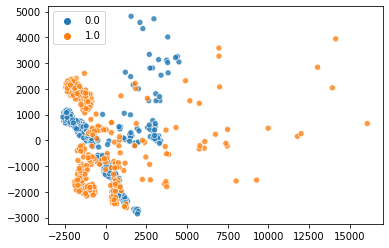

In [7]:
plt.figure(figsize=(6,4))
plt.tight_layout()
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y, alpha=0.8)
# plt.legend()


## Directly using the 1024 dim Embeddings

In [8]:
X = np.vstack([real_values,anomalous_values])
Y = np.hstack([np.zeros((real_values.shape[0])),np.ones((anomalous_values.shape[0]))])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150, 120, 90, 60), random_state=1,learning_rate='adaptive',max_iter=5000).fit(X_train, y_train)
NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

0.5967

In [9]:
len(X)

602

# Speed Limit Anomalous Data

In [10]:
# pca = PCA(n_components=2)
# pca_result_real = pca.fit_transform(real_values)
# pca_result_anom = pca.fit_transform(anomalous_values)
# X = np.vstack([real_values,anomalous_values])
# Y = np.hstack([np.zeros((real_values.shape[0])),np.ones((anomalous_values.shape[0]))])
X, Y= getTSNE(real_values,speed_lim_anomalous_values)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 120, 90, 60), random_state=1,learning_rate='adaptive',max_iter=500).fit(X_train, y_train)
NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

NameError: name 'speed_lim_anomalous_values' is not defined